# State space model and Kalman filters

State-space models help us analyse time series problems that involve dynamical systems. They are widely used in statistics, econometrics, engineering, computer science and finance. **Typically state-space models describe the relationship between some hidden (unknown) variables and their observed measurements.** Basically we are trying to get more accurate information about the current state of the system (hidden variables) by using both the measurements and our knowledge about the system (how it evolves in time). 

Our goal is to infer the properties of the hidden variable given observed measurements. There are three main types of inference:

* Filtering — removing measurement error from the data (trying to estimate the true value of the hidden variable from the observed variables).
* Forecasting — predicting the future values of observed or hidden variables.
* Smoothing — trying to estimate the past values of hidden variable from the measurements up to some future time.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n = 25

## Static system

* state equation: $ x_{t+1} = x_t $  <font color='red'>[no changes at all]</font>
* measurement equation: $ y_t = x_t + \epsilon_{t}, \epsilon_t \mathop{\sim}\limits^{\mathrm{iid}} \mathcal{N}(0, \sigma_{\epsilon}^2)$
----
* state update equation: $\hat{x}_{t|t} = \hat{x}_{t|t-1} + \frac{1}{t}(\hat{y}_t - \hat{x}_{t|t-1})$
* estimate of current state: $\hat{x}_{t|t}$
* prediction of the current state from previous time step: $\hat{x}_{t|t-1}$
* current measurement: $y_t$

In [4]:
np.random.seed(88)
x = np.array([100]*n) # actual states
y = x + np.random.randn(n) # measurements [green]
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states [yellow]

for t in range(len(x)):
    if t==0:
        x_filt[t] = y[t] # initial guess = first measurement
        x_pred[t] = x_filt[t]
    else:
        x_pred[t] = x_filt[t-1] # extrapolate current state from previous estimate
        x_filt[t] = x_pred[t] + 1/(t+1) * (y[t] - x_pred[t]) # estimate current state

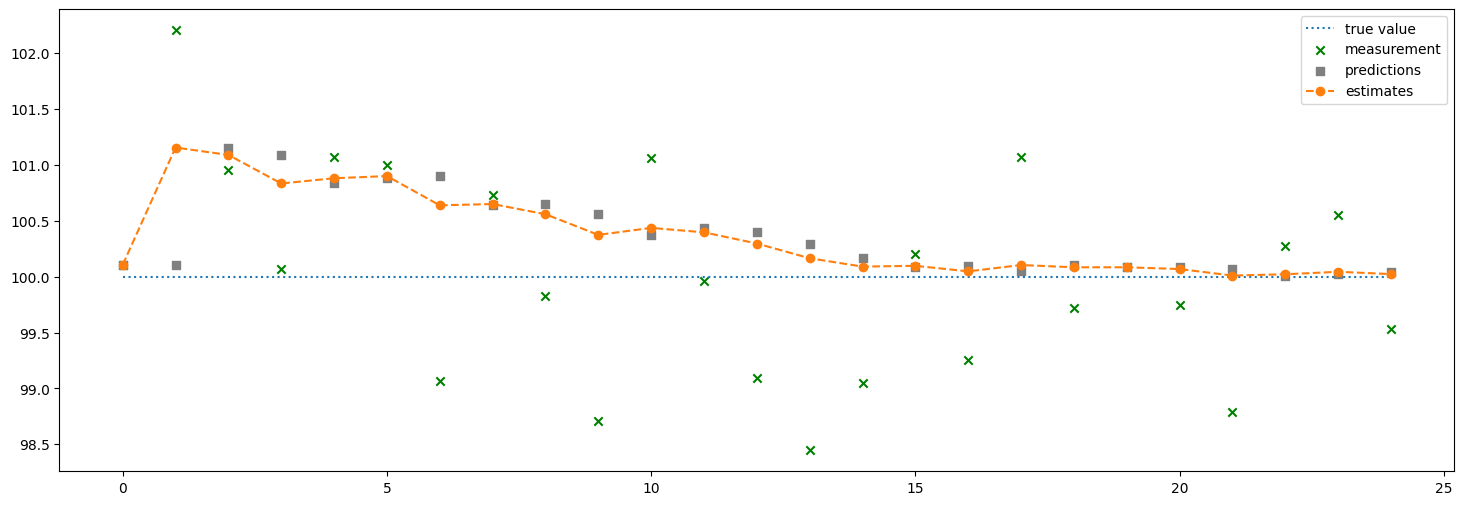

In [8]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

In [7]:
data = {'$x_t$':x, '$y_t$':y, '$\hat{x}_{t|t-1}$':x_pred, '$\hat{x}_{t|t}$':x_filt}
pd.DataFrame.from_dict(data).head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
$x_t$,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
$y_t$,100.106884,102.205815,100.956563,100.068411,101.068514,100.997183,99.068452,100.730430,99.828786,98.711309,101.061436,99.959499
$\hat{x}_{t|t-1}$,100.106884,100.106884,101.156350,101.089754,100.834418,100.881237,100.900562,100.638832,100.650282,100.559004,100.374235,100.436708
$\hat{x}_{t|t}$,100.106884,101.156350,101.089754,100.834418,100.881237,100.900562,100.638832,100.650282,100.559004,100.374235,100.436708,100.396940


## Dynamic system (known growth rate)

* state equation: $ x_{t+1} = x_t + 1 $ 
* measurement equation: $ y_t = x_t + \epsilon_{t}, \epsilon_t \mathop{\sim}\limits^{\mathrm{iid}} \mathcal{N}(0, \sigma_{\epsilon}^2)$
----
* state update equation: $\hat{x}_{t|t} = \hat{x}_{t|t-1} + g(\hat{y}_t - \hat{x}_{t|t-1})$ <br/>
Factor g plays is important here and must be chosen carefully. It determines how much we believe in our measurement versus our model predictions. High values of g will give more weight to measurements and less weight to model predictions and vice versa.
* estimate of current state: $\hat{x}_{t|t}$
* prediction of the current state from previous time step: $\hat{x}_{t|t-1}$
* current measurement: $y_t$


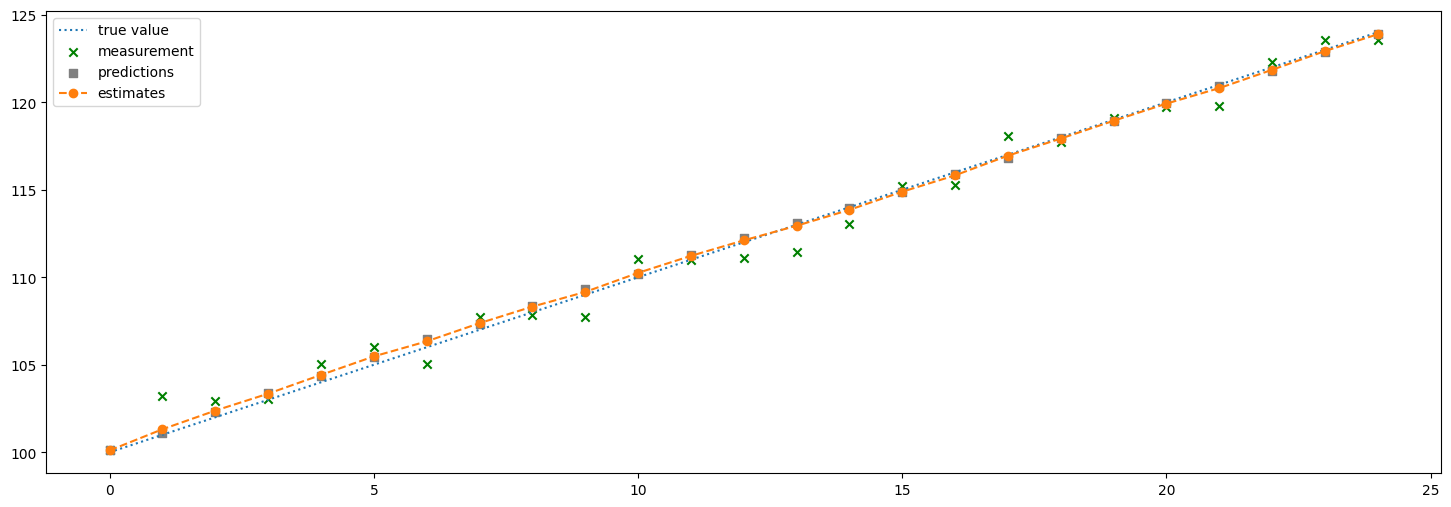

In [9]:
n = 25
np.random.seed(88)
x = np.arange(100,100+n) # actual states
y = x + np.random.randn(n) # measurements
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states
g = 0.1  # we trust model prediction but not the measurement

growth_rate = 1

for t in range(len(x)):
    if t==0:
        x_filt[t] = y[t] # initial guess = first measurement
        x_pred[t] = x_filt[t]
    else:
        x_pred[t] = x_filt[t-1] + growth_rate # extrapolate current state from previous estimate
        x_filt[t] = x_pred[t] + g*(y[t] - x_pred[t]) # estimate current state
        
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

In [10]:
data = {'$x_t$':x, '$y_t$':y, '$\hat{x}_{t|t-1}$':x_pred, '$\hat{x}_{t|t}$':x_filt}
pd.DataFrame.from_dict(data).head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
$x_t$,100.000000,101.000000,102.000000,103.000000,104.000000,105.000000,106.000000,107.000000,108.000000,109.000000,110.000000,111.000000
$y_t$,100.106884,103.205815,102.956563,103.068411,105.068514,105.997183,105.068452,107.730430,107.828786,107.711309,111.061436,110.959499
$\hat{x}_{t|t-1}$,100.106884,101.106884,102.316777,103.380756,104.349521,105.421421,106.478997,107.337942,108.377191,109.322351,110.161247,111.251265
$\hat{x}_{t|t}$,100.106884,101.316777,102.380756,103.349521,104.421421,105.478997,106.337942,107.377191,108.322351,109.161247,110.251265,111.222089


## Dynamic system (wrong assumption about growth rate)

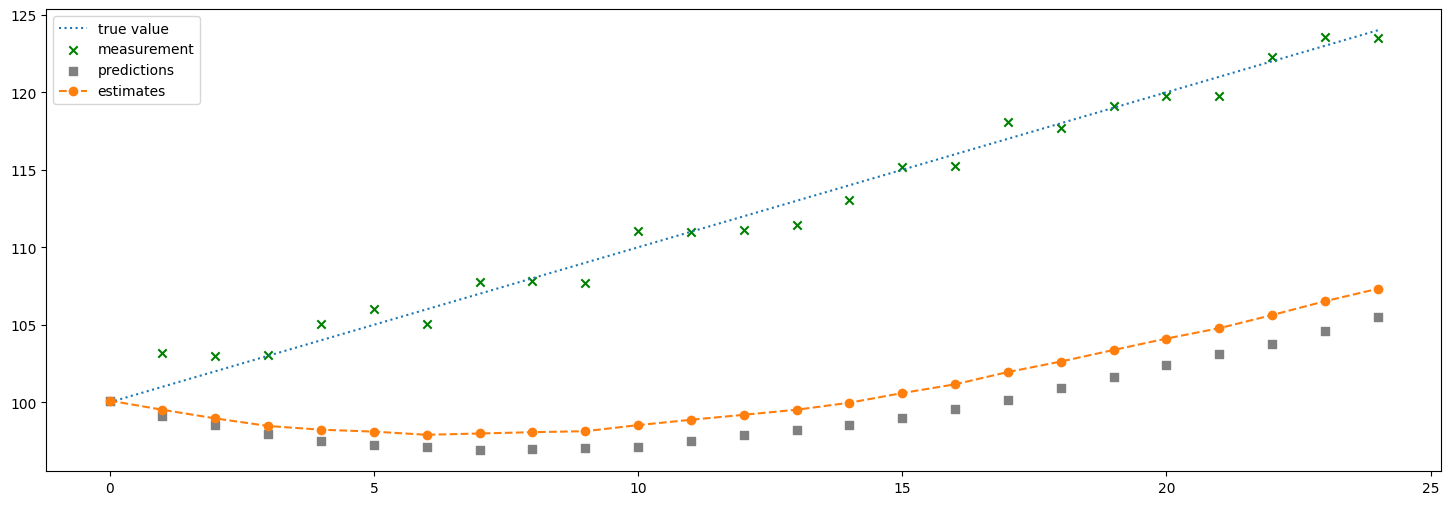

In [13]:
np.random.seed(88)
x = np.arange(100,100+n) # actual states
y = x + np.random.randn(n) # measurements
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states
g = 0.1

growth_rate = -1

for t in range(len(x)):
    if t==0:
        x_filt[t] = y[t] # initial guess = first measurement
        x_pred[t] = x_filt[t]
    else:
        x_pred[t] = x_filt[t-1] + growth_rate # extrapolate current state
        x_filt[t] = x_pred[t] + g*(y[t] - x_pred[t])

plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

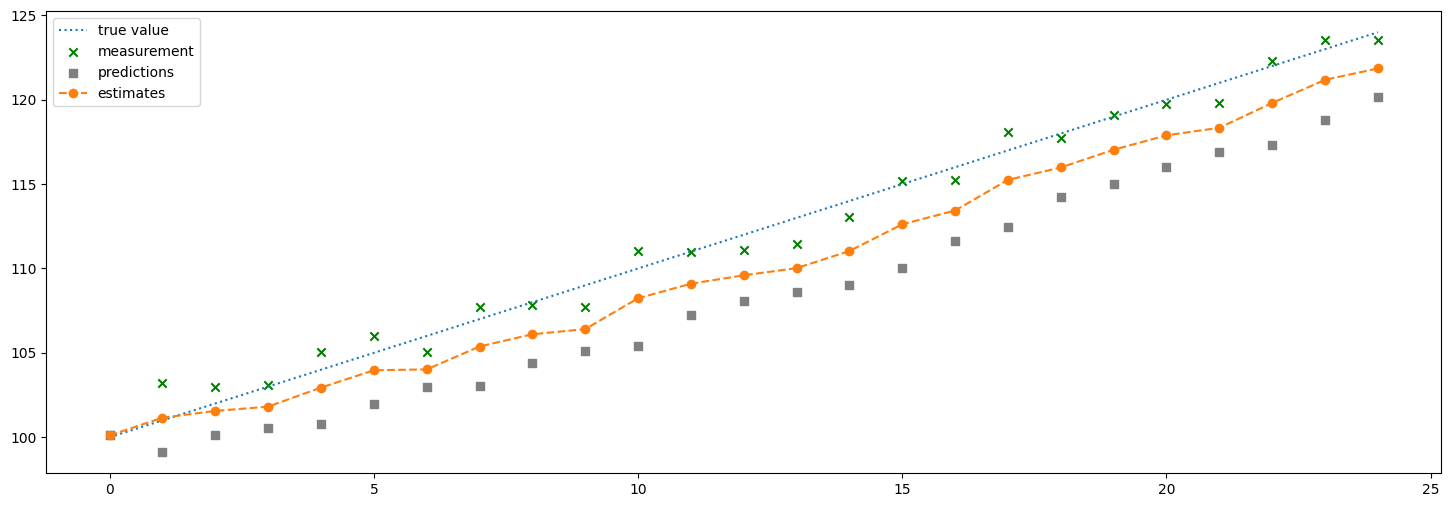

In [14]:
np.random.seed(88)
x = np.arange(100,100+n) # actual states
y = x + np.random.randn(n) # measurements
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states
g = 0.5

growth_rate = -1

for t in range(len(x)):
    if t==0:
        x_filt[t] = y[t] # initial guess = first measurement
        x_pred[t] = x_filt[t]
    else:
        x_pred[t] = x_filt[t-1] + growth_rate # extrapolate current state
        x_filt[t] = x_pred[t] + g*(y[t] - x_pred[t])
        
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

## Dynamic system (unknown, but constant growth rate)

* state equation: $ x_{t+1} = x_t + \dot{x}_t $ and $ \dot{x}_{t+1} = \dot{x}_t $ 
* measurement equation: $ y_t = x_t + \epsilon_{t}, \epsilon_t \mathop{\sim}\limits^{\mathrm{iid}} \mathcal{N}(0, \sigma_{\epsilon}^2)$
----
* state update equation: $\hat{x}_{t|t} = \hat{x}_{t|t-1} + g(\hat{y}_t - \hat{x}_{t|t-1})$ and $\hat{\dot{x}}_{t|t} = \hat{\dot{x}}_{t|t-1} + h(\hat{y}_t - \hat{x}_{t|t-1})$ <br/>
Factor g plays is important here and must be chosen carefully. It determines how much we believe in our measurement versus our model predictions. High values of g will give more weight to measurements and less weight to model predictions and vice versa.
* estimate of current state: $\hat{x}_{t|t}$
* prediction of the current state from previous time step: $\hat{x}_{t|t-1}$
* current measurement: $y_t$


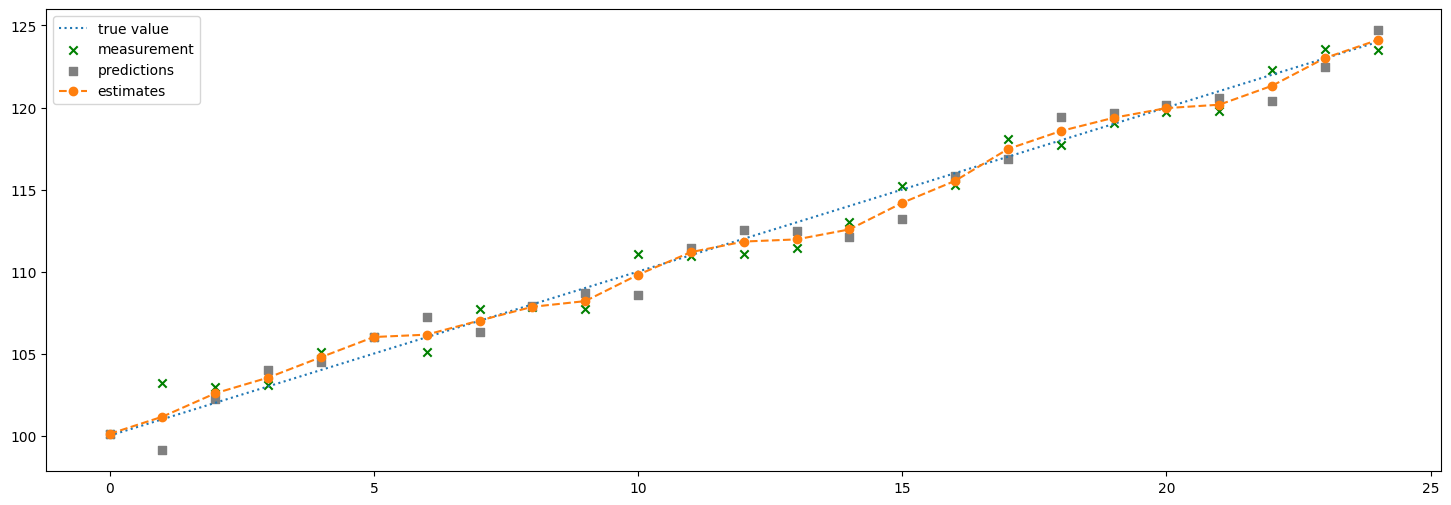

In [17]:
np.random.seed(88)
x = np.arange(100, 100+n) # actual states
y = x + np.random.randn(n) # measurements
dx = np.zeros(len(x))
x_pred = np.zeros(len(x))
x_filt = np.zeros(len(x))
g = 0.5
h = 0.5

for t in range(len(x)):
    if t == 0:
        x_filt[t] = y[t] # initial guess = first measurement
        dx[t] = -1 # initial guess of growth rate
        x_pred[t] = x_filt[t]
    else:
        x_pred[t] = x_filt[t-1] + dx[t-1]  # extrapolate current state
        dx[t] = dx[t-1] + h*(y[t] - x_pred[t]) # estimate growth rate
        x_filt[t] = x_pred[t] + g*(y[t] - x_pred[t]) # estimate current state

plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()  

In [18]:
data = {'$x_t$':x, '$y_t$':y, '$\hat{\dot{x}}$':dx, '$\hat{x}_{t|t-1}$':x_pred, '$\hat{x}_{t|t}$':x_filt}
pd.DataFrame.from_dict(data).head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
$x_t$,100.000000,101.000000,102.000000,103.000000,104.000000,105.000000,106.000000,107.000000,108.000000,109.000000,110.000000,111.000000
$y_t$,100.106884,103.205815,102.956563,103.068411,105.068514,105.997183,105.068452,107.730430,107.828786,107.711309,111.061436,110.959499
$\hat{\dot{x}}$,-1.000000,1.049465,1.424839,0.956031,1.243662,1.229982,0.143785,0.859783,0.837069,0.348438,1.604968,1.379780
$\hat{x}_{t|t-1}$,100.106884,99.106884,102.205815,104.006028,104.493250,106.024544,107.240845,106.298434,107.874216,108.688570,108.548378,111.409874
$\hat{x}_{t|t}$,100.106884,101.156350,102.581189,103.537220,104.780882,106.010864,106.154649,107.014432,107.851501,108.199939,109.804907,111.184687


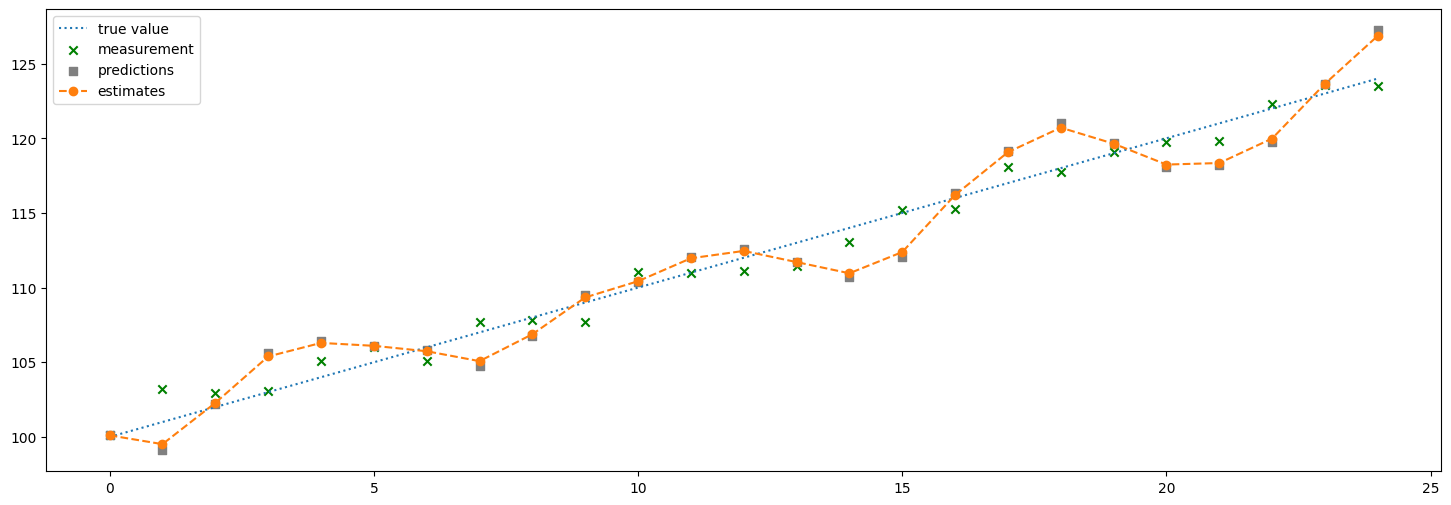

In [19]:
np.random.seed(88)
x = np.arange(100,100+n) # actual states
y = x + np.random.randn(n) # measurements
dx = np.zeros(len(x)) # estimated growth rates
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states

# the results obtained depend on the choice of parameters g and h. Poor choice of parameters 
# will lead to poor results as demonstrated on the plot below. 
g = 0.1
h = 0.9 

for t in range(len(x)):
    if t==0:
        x_filt[t] = y[t] # initial guess = first measurement
        dx[t] = -1 # initial guess of growth rate
        x_pred[t] = x_filt[t]
    else:
        x_pred[t] = x_filt[t-1] + dx[t-1] # extrapolate current state
        dx[t] = dx[t-1] + h*(y[t] - x_pred[t]) # estimate growth rate
        x_filt[t] = x_pred[t] + g*(y[t] - x_pred[t]) # estimate current state
        
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

## g-h filter (👆)

# Kalman filters

* $r$: measurment uncentainty
* $p$: estimate uncertainty
* $q$: process noise variance
* $K$: Kalman gain


Measurement uncertainty is just variance of the measurement error. Estimate uncertainty is variance of our estimate.

## Kalman filter in one dimension (static system)

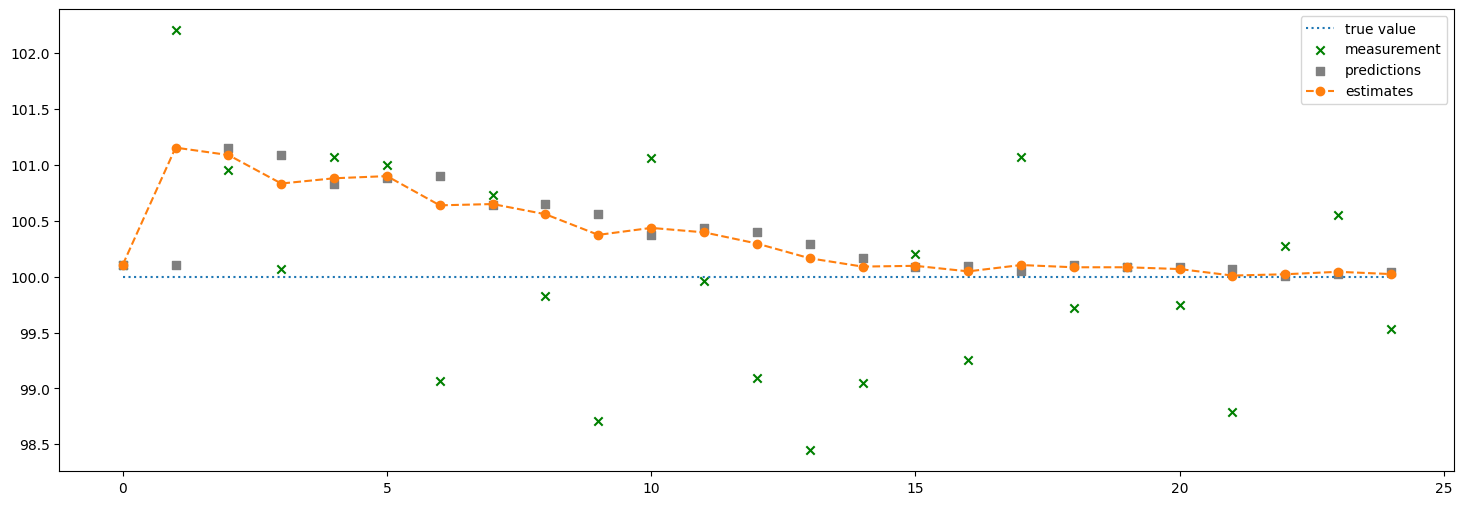

In [31]:
np.random.seed(88)
x = np.array([100]* n) # actual states
r = 1 # measurement variance [x]
y = x + np.random.randn(n) * np.sqrt(r) # measurements
p_pred = np.zeros(len(x)) # predicted (extrapolated) estimate variance [x]
p = np.zeros(len(x)) # estimated (filtered) estimate variance [x]
q = 0 # process noise variance
K = np.zeros(len(x)) # Kalman gain
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states

# initial guess of state and estimate uncetainty
x_0 = y[0]
p_0 = 500

for t in range(len(x)):
    if t == 0:
        x_pred[t] = x_0 # initial guess = first measurement
        p_pred[t] = p_0 # inital guess
        K[t] = p_pred[t] / (p_pred[t] + r)
        p[t] = (1 - K[t]) * p_pred[t]
        x_filt[t] = x_pred[t] + K[t] * (y[t] - x_pred[t])
    else:
        x_pred[t] = x_filt[t-1] # state extrapolation
        p_pred[t] = p[t-1] + q # covariance extrapolation
        K[t] = p_pred[t] / (p_pred[t] + r)
        p[t] = (1 - K[t]) * p_pred[t]
        x_filt[t] = x_pred[t] + K[t] * (y[t] - x_pred[t])


plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

## Kalman filter in one dimension (dynamic system, nonlinear growth)

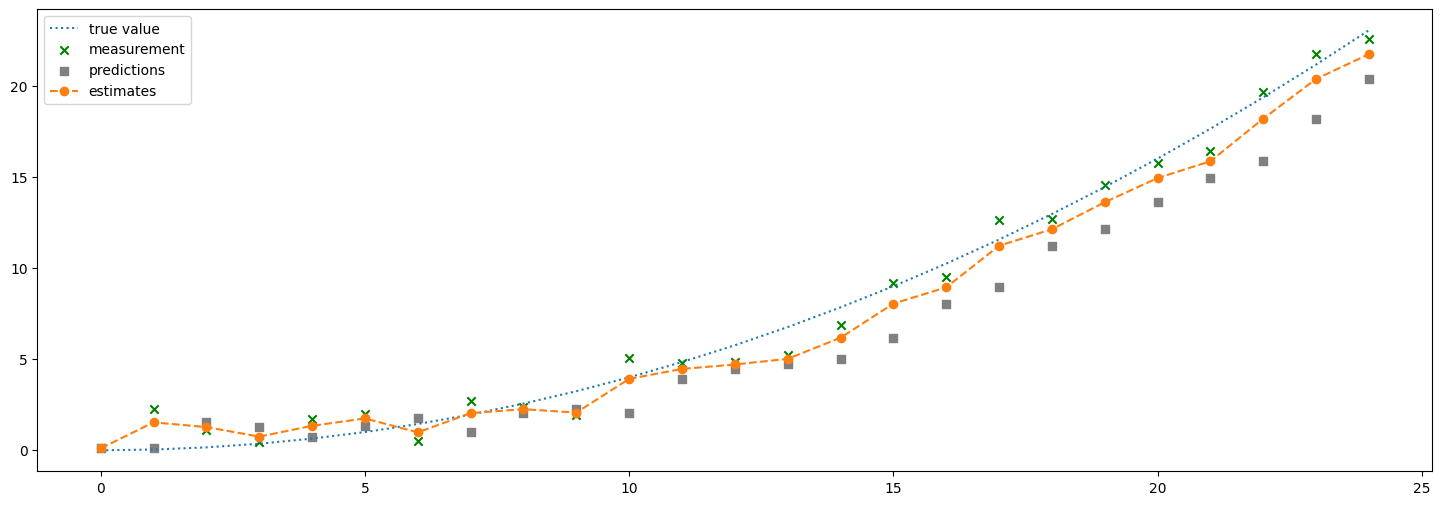

In [32]:
np.random.seed(88)
x = (np.arange(0,n)*0.2)**(2) # actual states
r = 1 # measurement variance
y = x + np.random.randn(n)*np.sqrt(r) # measurements
p_pred = np.zeros(len(x)) # predicted (extrapolated) estimate variance
p = np.zeros(len(x)) # estimated (filtered) estimate variance
q = 1 # process noise variance
K = np.zeros(len(x)) # Kalman gain
x_pred = np.zeros(len(x)) # predicted (extrapolated) states
x_filt = np.zeros(len(x)) # estimated (filtered) states

# initial guess of state and estimate uncertainty
x_0 = y[0]
p_0 = 500

for t in range(len(x)):
    if t==0:
        x_pred[t] = x_0 
        p_pred[t] = p_0
        K[t] = p_pred[t] / (p_pred[t] + r)
        p[t] = (1 - K[t]) * p_pred[t]
        x_filt[t] = x_pred[t] + K[t]*(y[t] - x_pred[t])
    else:
        x_pred[t] = x_filt[t-1] # state extrapolation
        p_pred[t] = p[t-1] + q # covariance extrapolation
        K[t] = p_pred[t] / (p_pred[t] + r) # Kalman gain
        x_filt[t] = x_pred[t] + K[t]*(y[t] - x_pred[t]) # state estimation
        p[t] = (1 - K[t]) * p_pred[t] # covariance estimation
        
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), x, label='true value', linestyle='dotted')
plt.scatter(np.arange(n), y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), x_pred, label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), x_filt, label='estimates', marker='o', linestyle='dashed')
plt.legend()

## Kalman filter in multiple dimensions

* State equation: $\hat{x}_{t+1|t} = F \times \hat{x}_t + G \times u_t$<br/>
$\Rightarrow$ <br/>
$[state\; transition\; matrix] \times [current\; state\; estimate] + [control\; matrix] \times [control\; variable] $

* Measurement equation: $y_t = H \times x_t + v_t$ <br/>
$\Rightarrow$ <br/>
$[observation\; matrix] \times x_t + [measurment\; noise\; vector] $

* Covariance extrapolation equation: $\hat{P}_{t+1|t} = F \times \hat{P}_{t|t} \times F^T + Q$<br/>
$\Rightarrow$ <br/>
$[state\; transition\; matrix] \times [current convariance estimate] \times F^T + [process\; noise\; matrix] $

* State update equation: $\hat{x}_{t|t} = \hat{x}_{t|t-1} + K_t(y_t - H\hat{x}_{t|t-1})$  [update estimate]

* Convariance update equation: $\hat{P}_{t|t} = (I - K_tH)\hat{P}_{t|t-1}(I-K_tH)^T + K_tRK_t^T$

* Kalman gain equation: $K_t = \hat{P}_{t|t-1} H^T(H\hat{P}_{t|t-1}H^T + R)^{-1}$

* $F$: state transition matrix
* $H$: observation matrix
* $Q$: process noise matrix
* $R$: represents measurement uncertainty matrix

In [33]:
n = 25
np.random.seed(88)
X = np.vstack([[np.arange(100,100+n)],[np.array([1]*n)]]) # actual states
R = np.array([[1]]) # measurement covariance matrix
Y = X[0,:] + np.random.randn(n)*np.sqrt(R[0,0])
P_pred = np.zeros((n,X.shape[0],X.shape[0]))
P = np.zeros((n,X.shape[0],X.shape[0]))
K = np.zeros((n,2,1))
X_pred = np.zeros(X.shape)
X_filt = np.zeros(X.shape)
H = np.array([[1,0]]) # observation matrix
F = np.array([[1,1],[0,1]]) # state transition matrix
Q = np.array([[0,0],[0,0]]) # process noise matrix (for simplicity I assume that our model is perfect)

# initial guess of state and estimate uncertainty
X_0 = np.hstack([Y[0],[-1]])
P_0 = np.array([[500,0],[0,500]])

In [34]:
for t in range(X.shape[1]):
    if t==0:
        X_pred[:,t] = F @ X_0 # state extrapolation
        P_pred[t,:] = F @ P_0 @ F.T + Q # covariance extrapolation
        K[t,:] = P_pred[t,:] @ H.T @ np.linalg.inv(H @ P_pred[t,:] @ H.T + R) # calculate Kalman gain
        X_filt[:,t] = X_pred[:,t] + K[t,:] @ (Y[t] - H @ X_pred[:,t]) # update estimate
        P[t,:] = ((np.eye(2) - K[t,:] @ H) @ P_pred[t,:] @ 
                  (np.eye(2) - K[t,:] @ H).T + K[t,:] @ R @ K[t,:].T) # update estimate uncertainty
    else:    
        X_pred[:,t] = F @ X_filt[:,t-1] # state extrapolation 
        P_pred[t,:] = F @ P[t-1,:] @ F.T + Q # covariance extrapolation
        K[t,:] = P_pred[t,:] @ H.T @ np.linalg.inv(H @ P_pred[t,:] @ H.T + R) # calculate Kalman gain
        X_filt[:,t] = X_pred[:,t] + K[t,:] @ (Y[t] - H @ X_pred[:,t]) # update state estimate
        P[t,:] = ((np.eye(2) - K[t,:] @ H) @ P_pred[t,:] @ 
                  (np.eye(2) - K[t,:] @ H).T + K[t,:] @ R @ K[t,:].T) # update estimate uncertainty

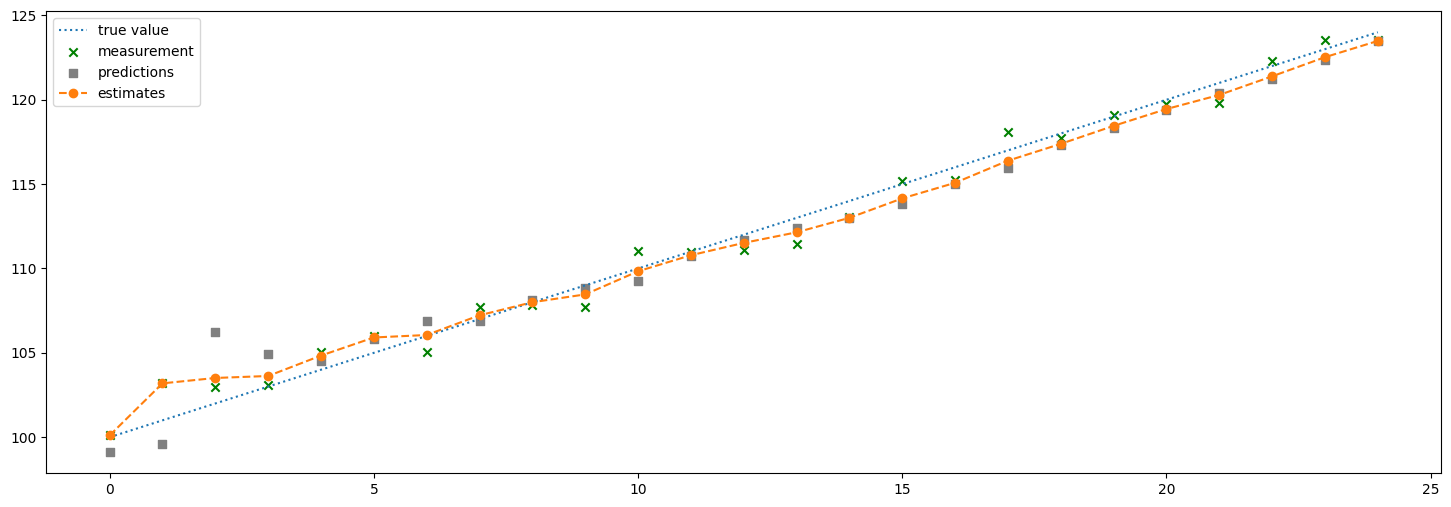

In [35]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), X[0,:], label='true value', linestyle='dotted')
plt.scatter(np.arange(n), Y, label='measurement', marker='x', c='g')
plt.scatter(np.arange(n), X_pred[0,:], label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), X_filt[0,:], label='estimates', marker='o', linestyle='dashed')
plt.legend()

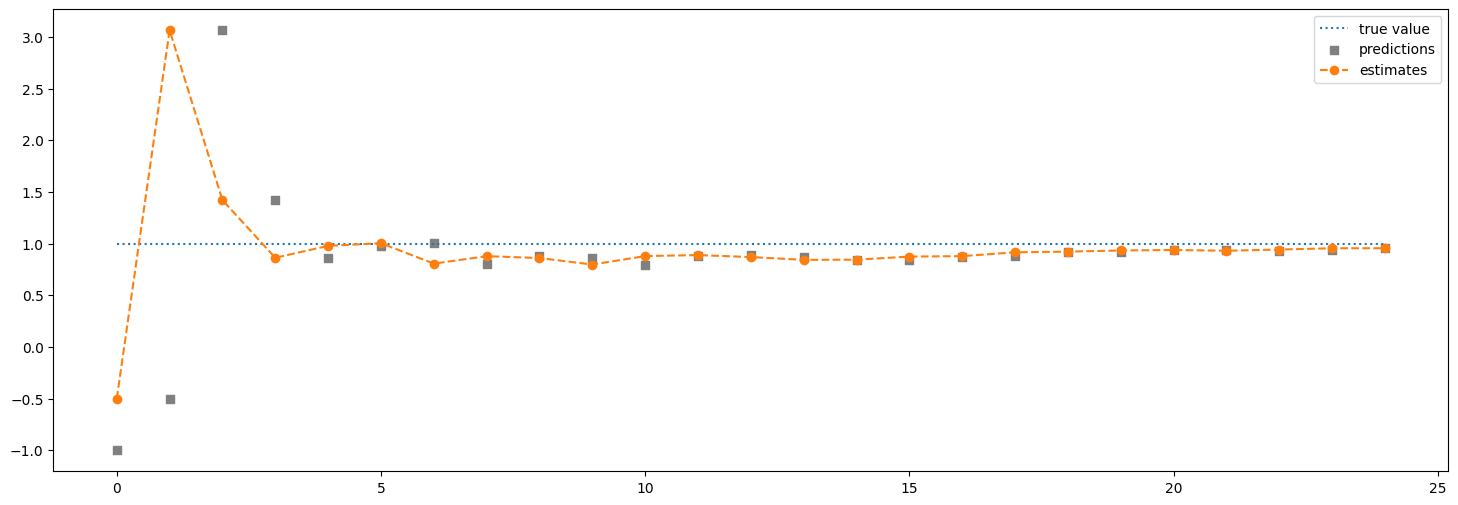

In [36]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(n), X[1,:], label='true value', linestyle='dotted')
plt.scatter(np.arange(n), X_pred[1,:], label='predictions', marker='s', c='grey')
plt.plot(np.arange(n), X_filt[1,:], label='estimates', marker='o', linestyle='dashed')
plt.legend()

## FilterPy implementation (multiple dimensions)

In [37]:
from filterpy.kalman import KalmanFilter

f = KalmanFilter(dim_x=2, dim_z=1)
f.x = X_0
f.F = F
f.H = H
f.P = P_0 
f.R = R
f.Q = Q

for y in Y:
    f.predict()
    f.update(y)
    print(f.x)

[100.1058853  -0.5004995]
[103.19159822   3.06440868]
[103.51102862   1.42070257]
[103.62867015   0.86285799]
[104.83748928   0.97809395]
[105.91065905   1.00400959]
[106.05783998   0.80636528]
[107.22501228   0.87850093]
[107.99975704   0.86019658]
[108.46324768   0.79757535]
[109.83361893   0.87938422]
[110.78567333   0.88886095]
[111.51570143   0.86980462]
[112.14392444   0.84296687]
[113.00186653   0.84451579]
[114.15500378   0.87437797]
[115.07753583   0.87875501]
[116.38847514   0.9157946 ]
[117.38579784   0.92240419]
[118.45273787   0.93352106]
[119.45024071   0.93820215]
[120.28639443   0.93108322]
[121.39025407   0.94260053]
[122.52387119   0.95479194]
[123.48674279   0.95528657]


## Pykalman implementation (multiple dimensions)

In [40]:
from pykalman import KalmanFilter

kf = KalmanFilter(transition_matrices = [[1, 1], [0, 1]], observation_matrices = [[0.1, 0.5], [-0.3, 0.0]])
measurements = np.asarray([[1,0], [0,0], [0,1]])  # 3 observations
kf = kf.em(measurements, n_iter=5)
filtered_state_means, filtered_state_covariances = kf.filter(measurements)
# (smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)

ValueError: object has no __init__ method

# Smoothing

## Resources

* https://medium.com/@financialnoob/introduction-to-state-space-models-and-kalman-filters-d5792f7dde0f
* https://www.kalmanfilter.net/default.aspx
* https://pykalman.github.io/#
* https://www.youtube.com/watch?v=R63dU5w_djQ [finance][decompose]